In [22]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from upsetplot import UpSet

In [23]:
# read in the full dataframe
full_LR_df = pd.read_csv('/Users/victoriagao/Documents/MSc/rotation/GW_lab/NEST_revision/RC1.7/2D_3D/Female_Naive_id1_top10k_z_axis.csv')


In [24]:
full_LR_df

,from_cell,to_cell,ligand,receptor,edge_rank,component,from_id,to_id,attention_score,z_axis_from,z_axis_to
0,a295d3f5-9149-41ef-92f4-25531e5dbfe7,13223e65-fd7b-497b-b54a-a9c941576e47,FN1,IGF2R,0,-1,33436,20759,0.020607,500,300
1,a34e5903-7e47-4a96-8b6d-9f12dcba3c91,f210a991-ece7-45bd-a758-dad8b92d2333,OXT,TACR1,0,-1,13944,27406,0.981292,200,400
2,a295d3f5-9149-41ef-92f4-25531e5dbfe7,8b4dbfee-10d5-4877-996c-e73da8c05efe,FN1,IGF2R,1,-1,33436,33432,0.020608,500,500
3,a34e5903-7e47-4a96-8b6d-9f12dcba3c91,03333b23-50bd-4466-ab09-25d4d7b6dba6,OXT,TACR1,1,-1,13944,20494,0.981295,200,300
4,eabfb28b-3d10-4907-bb59-44ff4065f0e0,441e582f-acdb-4240-a16e-bc48a3b79426,PNOC,GALR2,2,-1,33144,19837,0.020607,500,300
...,...,...,...,...,...,...,...,...,...,...,...
9995,e7ab5b11-8723-4b87-ad44-5b01cc624247,e5f32358-31e8-4724-b681-639dce44acf2,OXT,CCKAR,5016,-1,9558,8168,0.981344,100,100
9996,23098c41-9032-47a4-97cc-f4e00c0fd39c,62c77dd5-b7c5-4e6e-8650-b4fdc74d436f,PNOC,NPY2R,5017,-1,18724,18665,0.019888,200,200
9997,36dd0a49-a2b9-4dc0-ad4b-ba759e9b062b,c72db737-acb8-4a6a-a6cd-e2f5c1f3e049,OXT,CCKAR,5017,-1,22708,16198,0.981371,300,200
9998,87e96a56-ddd6-4dfb-9e57-45ee28d9ada3,5d40b5f3-271e-4969-ac57-3863a8804180,BDNF,ESR1,5018,-1,34739,21991,0.022791,500,300


In [25]:
# Extract rows from the full_LR_df that z_axis_from == z_axis_to
within_slices_LR = full_LR_df[full_LR_df['z_axis_from'] == full_LR_df['z_axis_to']]
# make new dataframe with only columns: ligand, receptor, z_axis_from, z_axis_to
withiin_slices_LR = within_slices_LR[['ligand', 'receptor', 'z_axis_from', 'z_axis_to']]
# make new column combining ligand and receptor, such that ligand_receptor = ligand + '-' + receptor
within_slices_LR['ligand_receptor'] = within_slices_LR['ligand'] + '-' + within_slices_LR['receptor']
within_slices_LR

/var/folders/b0/dbz12pb13hg1zrjq45vwhc680000gn/T/ipykernel_94649/4273359344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  within_slices_LR['ligand_receptor'] = within_slices_LR['ligand'] + '-' + within_slices_LR['receptor']


,from_cell,to_cell,ligand,receptor,edge_rank,component,from_id,to_id,attention_score,z_axis_from,z_axis_to,ligand_receptor
2,a295d3f5-9149-41ef-92f4-25531e5dbfe7,8b4dbfee-10d5-4877-996c-e73da8c05efe,FN1,IGF2R,1,-1,33436,33432,0.020608,500,500,FN1-IGF2R
5,a34e5903-7e47-4a96-8b6d-9f12dcba3c91,e5789100-58b6-4510-ac4e-9dc58f13fc4d,OXT,TACR1,2,-1,13944,14451,0.981299,200,200,OXT-TACR1
6,8b4dbfee-10d5-4877-996c-e73da8c05efe,a295d3f5-9149-41ef-92f4-25531e5dbfe7,PNOC,NPY1R,3,-1,33432,33436,0.020610,500,500,PNOC-NPY1R
11,27732d61-3d6b-4341-9e73-d3edc700f7d5,9b1bf517-b77e-4a29-8f88-b860c4e7afb3,OXT,CCKAR,5,-1,16112,16121,0.981051,200,200,OXT-CCKAR
14,87e96a56-ddd6-4dfb-9e57-45ee28d9ada3,23ac6b16-8906-4a3d-ae14-76b401f9aaea,PNOC,GALR2,7,-1,34739,34752,0.020606,500,500,PNOC-GALR2
...,...,...,...,...,...,...,...,...,...,...,...,...
9983,28058340-23d5-4ef0-aa3f-e97e0be2abf4,b0846472-f1a0-4899-bc94-3e9a513b3253,OXT,CCKBR,5010,-1,3503,3140,0.981043,0,0,OXT-CCKBR
9985,5e7482cd-27e4-4b94-a89b-12b8c9585826,72ec6316-48f3-41b6-920e-4c79dcfdf2e7,FN1,IGF2R,5011,-1,2043,3267,0.982365,0,0,FN1-IGF2R
9992,f398ba70-db99-4d99-91d4-43f0f6d4ad0a,5f6a7b20-5bcb-443c-9384-156d0e3e4869,PNOC,NPY2R,5015,-1,28115,27805,0.021217,400,400,PNOC-NPY2R
9995,e7ab5b11-8723-4b87-ad44-5b01cc624247,e5f32358-31e8-4724-b681-639dce44acf2,OXT,CCKAR,5016,-1,9558,8168,0.981344,100,100,OXT-CCKAR


In [26]:
unique_z_axis = sorted(within_slices_LR['z_axis_from'].unique())  # Sorting ensures consistent ordering
unique_z_axis

[0, 100, 200, 300, 400, 500]

In [27]:
presence_absence_matrix = pd.DataFrame(index=within_slices_LR['ligand_receptor'].unique())
for z_val in unique_z_axis:
    # Create a Boolean column indicating presence/absence of each ligand-receptor pair in the given `z_axis_from`
    ligand_receptor_in_slice = within_slices_LR[within_slices_LR['z_axis_from'] == z_val]['ligand_receptor']
    presence_absence_matrix[z_val] = presence_absence_matrix.index.isin(ligand_receptor_in_slice)


In [28]:
presence_absence_matrix


,0,100,200,300,400,500
FN1-IGF2R,True,True,True,True,True,True
OXT-TACR1,True,True,True,True,True,True
PNOC-NPY1R,True,True,True,True,True,True
OXT-CCKAR,True,True,True,True,False,True
PNOC-GALR2,True,False,True,True,True,True
BDNF-ESR1,True,True,True,True,True,True
PNOC-NPY2R,True,True,True,True,True,True
OXT-HTR2C,True,True,True,True,True,True
PNOC-GALR1,True,True,False,False,True,True
PNOC-OPRL1,True,True,True,True,True,True


In [29]:
# # Calculate the mean attention score for each ligand-receptor pair
# mean_attention_scores = within_slices_LR.groupby('ligand_receptor')['attention_score'].mean()

# # Merge the presence-absence matrix with the mean scores
# presence_absence_matrix['value'] = mean_attention_scores

# # Convert the presence-absence DataFrame into a MultiIndex Series for UpSet plotting
# multi_index_series = presence_absence_matrix.groupby(list(presence_absence_matrix.columns[:-1]))['value'].sum()

# # Generate and plot the UpSet plot
# upset = UpSet(multi_index_series, subset_size='sum', show_counts=True)
# upset.plot()

# # Show the plot
# plt.suptitle("UpSet Plot of Ligand-Receptor Interactions Across z_axis_from Groups")
# plt.show()

#######################
# Convert the presence-absence matrix into a MultiIndex Series where each index is a unique combination
# This Series will count the number of ligand-receptor pairs in each combination
multi_index_series = presence_absence_matrix.groupby(list(presence_absence_matrix.columns)).size()



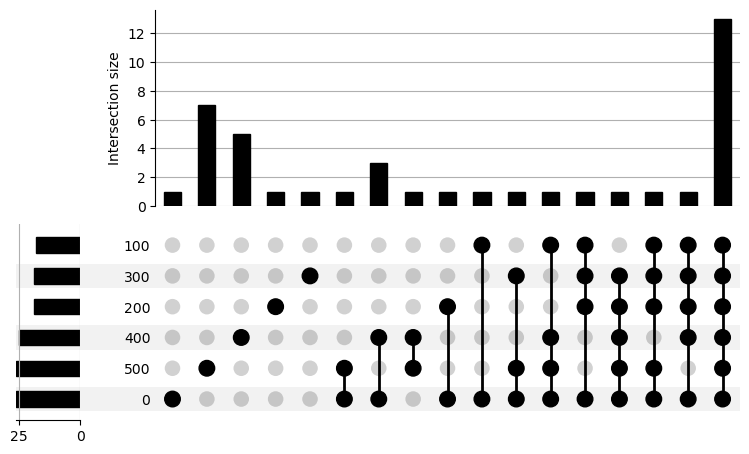

In [30]:
ax_dict = UpSet(multi_index_series).plot()


# # Generate and plot the UpSet plot using the count of unique ligand-receptor pairs for each intersection
# upset = UpSet(multi_index_series, subset_size='count', show_counts=True)
# upset.plot()

# # Show the plot
# plt.suptitle("UpSet Plot of Unique Ligand-Receptor Interactions Across z_axis_from Groups")
# plt.show()

In [31]:
multi_index_series

0      100    200    300    400    500  
False  False  False  False  False  True      7
                            True   False     5
                                   True      1
                     True   False  False     1
              True   False  False  False     1
True   False  False  False  False  False     1
                                   True      1
                            True   False     3
                     True   False  True      1
              True   False  False  False     1
                     True   True   True      1
       True   False  False  False  False     1
                            True   True      1
              True   True   False  False     1
                                   True      1
                            True   False     1
                                   True     13
dtype: int64

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

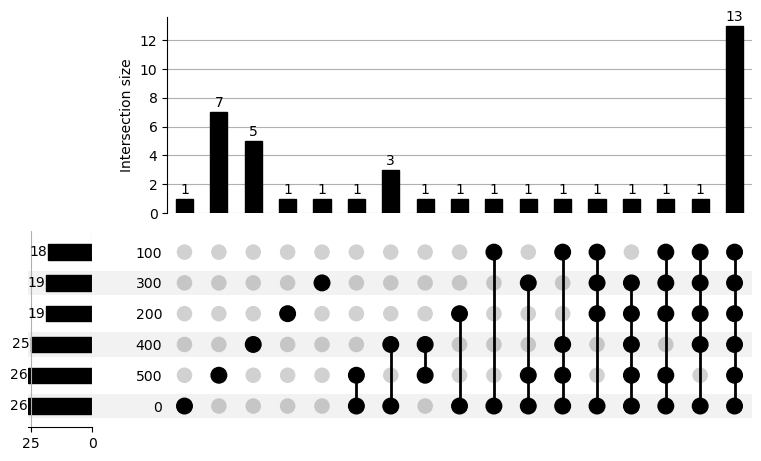

In [32]:
from upsetplot import generate_counts, plot
plot(multi_index_series, show_counts="{:,}")

#### Between slices

In [33]:
# Extract rows from the full_LR_df that z_axis_from == z_axis_to
between_slices_LR = full_LR_df[full_LR_df['z_axis_from'] != full_LR_df['z_axis_to']]
# make new dataframe with only columns: ligand, receptor, z_axis_from, z_axis_to
between_slices_LR = between_slices_LR[['ligand', 'receptor', 'z_axis_from', 'z_axis_to']]
# make new column combining ligand and receptor, such that ligand_receptor = ligand + '-' + receptor
between_slices_LR['ligand_receptor'] = between_slices_LR['ligand'] + '-' + between_slices_LR['receptor']
between_slices_LR

,ligand,receptor,z_axis_from,z_axis_to,ligand_receptor
0,FN1,IGF2R,500,300,FN1-IGF2R
1,OXT,TACR1,200,400,OXT-TACR1
3,OXT,TACR1,200,300,OXT-TACR1
4,PNOC,GALR2,500,300,PNOC-GALR2
7,TRH,LPAR1,500,400,TRH-LPAR1
...,...,...,...,...,...
9993,OXT,TACR1,300,200,OXT-TACR1
9994,PNOC,OPRL1,100,300,PNOC-OPRL1
9997,OXT,CCKAR,300,200,OXT-CCKAR
9998,BDNF,ESR1,500,300,BDNF-ESR1


In [34]:
unique_z_axis_between = sorted(between_slices_LR['z_axis_to'].unique())  # Sorting ensures consistent ordering
unique_z_axis_between

[0, 100, 200, 300, 400, 500]

In [35]:
presence_absence_matrix_between = pd.DataFrame(index=between_slices_LR['ligand_receptor'].unique())
for z_val in unique_z_axis_between:
    # Create a Boolean column indicating presence/absence of each ligand-receptor pair in the given `z_axis_from`
    ligand_receptor_in_slice = between_slices_LR[between_slices_LR['z_axis_to'] == z_val]['ligand_receptor']
    presence_absence_matrix_between[z_val] = presence_absence_matrix_between.index.isin(ligand_receptor_in_slice)

In [36]:
presence_absence_matrix_between

,0,100,200,300,400,500
FN1-IGF2R,True,True,True,True,True,True
OXT-TACR1,True,True,True,True,True,True
PNOC-GALR2,True,True,True,True,True,True
TRH-LPAR1,False,False,True,False,True,True
OXT-HTR2C,True,True,True,True,True,True
PNOC-NPY1R,True,True,True,True,True,True
PNOC-OPRL1,True,True,True,True,True,True
OXT-CCKAR,True,True,True,True,True,True
BDNF-ESR1,True,True,True,True,True,True
PNOC-OPRK1,True,True,True,True,True,True


In [37]:
multi_index_series_between = presence_absence_matrix_between.groupby(list(presence_absence_matrix_between.columns)).size()


In [38]:
multi_index_series_between

0      100    200    300    400    500  
False  False  False  False  False  True      3
                            True   False     5
                                   True      1
                     True   False  False     1
                                   True      1
              True   False  True   True      1
                     True   False  True      1
       True   False  False  False  True      1
                     True   False  False     1
                            True   True      1
              True   True   False  True      1
                            True   False     3
True   False  True   False  False  True      1
       True   True   True   False  True      1
                            True   False     1
                                   True     17
dtype: int64

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

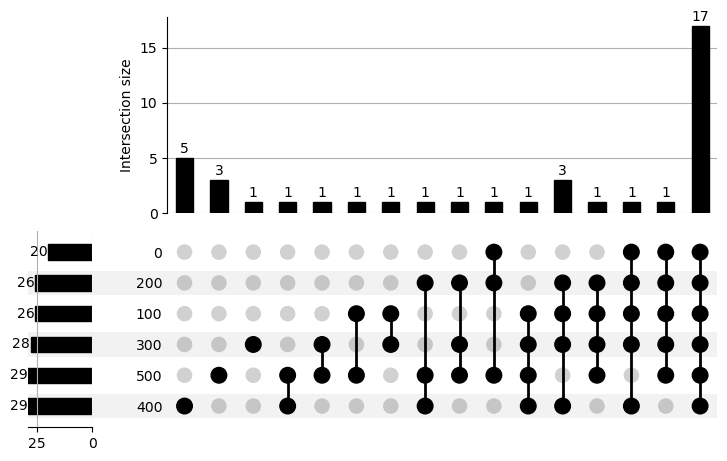

In [39]:
from upsetplot import generate_counts, plot
plot(multi_index_series_between, show_counts="{:,}")

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

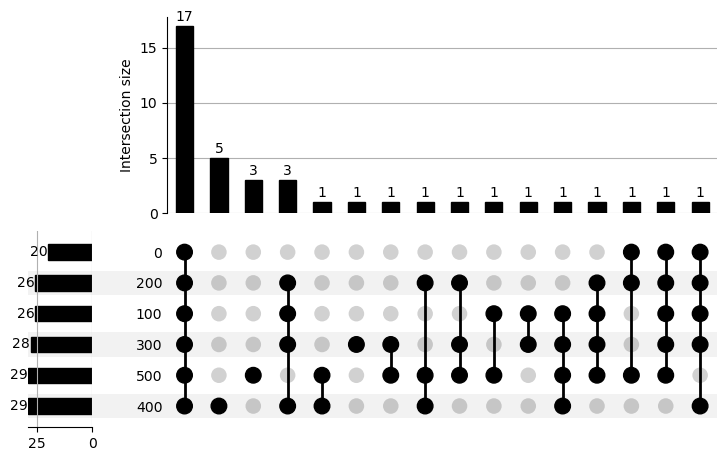

In [40]:
plot(multi_index_series_between, show_counts="{:,}", sort_by='cardinality')
